# Analysis of variance (ANOVA)

## Libraries and settings

In [24]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Get current working directory
print('Current working directory:', os.getcwd())

Current working directory: C:\Users\n-win\Desktop\ZHAW\Classes\Data Analytics\data_analytics\Week_06


## Read example data (used car data)

In [25]:
# Read data
df = pd.read_excel('t-tests_and_ANOVA.xlsx', sheet_name='anova_data')

# Show categories of 'Make'
print(df['Make'].value_counts())

# Show header
df.head()

Make
VW      20
BMW     20
Fiat    20
Name: count, dtype: int64


,Make,Price
0,VW,29000
1,VW,38000
2,VW,33000
3,VW,64000
4,VW,52000


## Create pivot table of mean price per make

In [26]:
# Create pivot table
table = pd.pivot_table(df, 
                       values='Price',
                       columns=['Make'], 
                       aggfunc=np.mean)
print(table)

Make       BMW     Fiat       VW
Price  54000.0  34000.0  41950.0


## Create grouped boxplot (groups = make, values = prices)

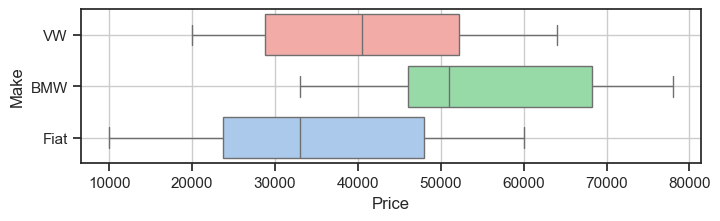

In [27]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="Price",
                 y="Make",
                 palette=['r', 'g', 'b'],
                 data=df,
                 orient='h')
plt.grid()
plt.show()

## Analysis of variance (ANOVA)

In [28]:
# Create subsets (groups)
vw = df.loc[df['Make'] == 'VW']
bmw = df.loc[df['Make'] == 'BMW']
fiat = df.loc[df['Make'] == 'Fiat']

# Create ANOVA
fvalue, p_value = stats.f_oneway(vw['Price'],
                                fiat['Price'], 
                                bmw['Price'])

# Print results
print('F-value:', fvalue.round(3), 'p-value', p_value.round(4))

F-value: 9.791 p-value 0.0002


## Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the used car prices of VW, BMW and Fiat differ. Note that, from the ANOVA, it is not clear which groups show differences of prices. For this a post-hoc test could be used (not part of the exercises).</p>

## Importing apartment data

In [29]:
# Read the data to a pandas data frame
df = pd.read_csv('apartments_data_enriched_cleaned.csv', 
                 sep=';', 
                 encoding='utf-8')[['web-scraper-order',
                                    'address_raw',
                                    'lat',
                                    'lon',
                                    'bfs_number',
                                    'bfs_name',
                                    'rooms', 
                                    'area', 
                                    'luxurious', 
                                    'price', 
                                    'price_per_m2',
                                    'pop_dens',
                                    'frg_pct',
                                    'mean_taxable_income',
                                    'dist_supermarket']]

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(5)

(774, 15)


,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49,0,1441,29.41,1221.272366,24.841283,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111,0,2600,23.42,1221.272366,24.841283,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58,0,1490,25.69,1221.272366,24.841283,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118,0,3240,27.46,1221.272366,24.841283,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66,0,1450,21.97,1221.272366,24.841283,65362.04268,974.844209


## Create three subsets (groups) with prices per m2 of the apartments data frame

In [30]:
# low population density (pop_dens <= 600)
low = df.loc[df['pop_dens'] <= 600]

# moderate population density (pop_dens > 600 & pop dens <=1500)
moderate = df.loc[(df['pop_dens'] > 600) & (df['pop_dens'] <= 1500)]

# high population density (pop dens >1500)
high = df.loc[df['pop_dens'] > 1500]

for name, g in [('low', low), ('moderate', moderate), ('high', high)]:
    print(name, 'n =', len(g))

low n = 105
moderate n = 217
high n = 452


## One-way ANOVA based on the three subsets

### The prices per m2 of rental apartments differ between the three groups

In [31]:
alpha = 0.05

low_ppm2 = low['price_per_m2']
mod_ppm2 = moderate['price_per_m2']
high_ppm2 = high['price_per_m2']

fvalue, p_value = stats.f_oneway(low_ppm2, mod_ppm2, high_ppm2)
print(f"ANOVA (price_per_m2 by pop_dens groups) -> F={fvalue}, p={p_value}")

# H_0: mean price_per_m2 is the same across groups
# H_1: mean price_per_m2 differs at least in one group

if p_value < alpha:
    print(f"p < {alpha} => reject H0: mean price_per_m2 differs among groups.")
else:
    print(f"p ≥ {alpha} => fail to reject H0: no significant mean difference detected.")

ANOVA (price_per_m2 by pop_dens groups) -> F=91.27226456541028, p=2.6516452554346628e-36
p < 0.05 => reject H0: mean price_per_m2 differs among groups.


### The areas of rental apartments differ between the three groups

In [32]:
alpha = 0.05

low_area = low['area']
mod_area = moderate['area']
high_area = high['area']

fvalue, p_value = stats.f_oneway(low_area, mod_area, high_area)
print(f"ANOVA (area by pop_dens groups) -> F={fvalue}, p={p_value}")

# H_0: mean area is the same across groups
# H_1: mean area differs at least in one group

if p_value < alpha:
    print(f"p < {alpha} => reject H0: mean area differs among groups.")
else:
    print(f"p ≥ {alpha} => fail to reject H0: no significant mean difference detected.")

ANOVA (area by pop_dens groups) -> F=28.477523832256615, p=1.169115608183478e-12
p < 0.05 => reject H0: mean area differs among groups.


### The number of rooms of rental apartments differ between the three groups

In [33]:
alpha = 0.05

low_rooms = low['rooms']
mod_rooms = moderate['rooms']
high_rooms = high['rooms']

fvalue, p_value = stats.f_oneway(low_rooms, mod_rooms, high_rooms)
print(f"ANOVA (rooms by pop_dens groups) -> F={fvalue}, p={p_value}")

# H_0: mean rooms is the same across groups
# H_1: mean rooms differs at least in one group

if p_value < alpha:
    print(f"p < {alpha} => reject H0: mean rooms differs among groups.")
else:
    print(f"p ≥ {alpha} => fail to reject H0: no significant mean difference detected.")

ANOVA (rooms by pop_dens groups) -> F=41.04343032955323, p=1.152295125280606e-17
p < 0.05 => reject H0: mean rooms differs among groups.


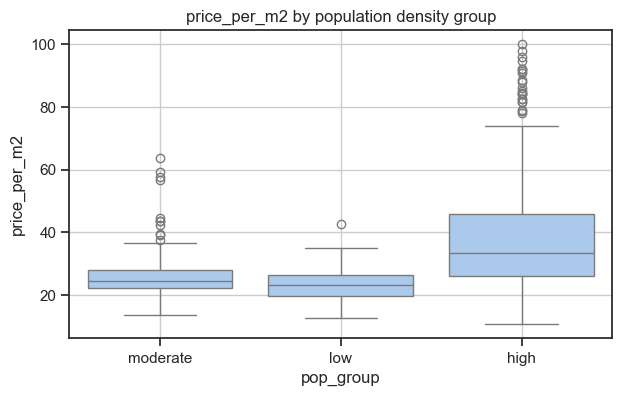

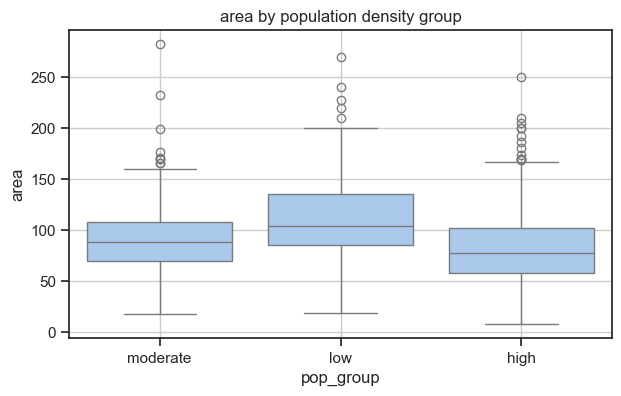

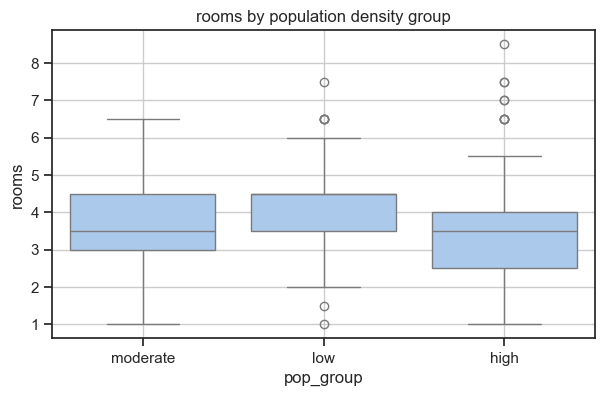

In [34]:
tmp = df.assign(pop_group=np.where(df['pop_dens']<=600, 'low',
                           np.where(df['pop_dens']<=1500, 'moderate', 'high')))

plt.figure(figsize=(7,4))
sns.boxplot(data=tmp, x='pop_group', y='price_per_m2')
plt.title('price_per_m2 by population density group')
plt.grid()
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=tmp, x='pop_group', y='area')
plt.title('area by population density group')
plt.grid()
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=tmp, x='pop_group', y='rooms')
plt.title('rooms by population density group')
plt.grid()
plt.show()

## Create pivot table with mean price_per_m2 per room size

In [35]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price_per_m2']],
               index=['rooms'],
               values=['price_per_m2'],
               aggfunc=[np.mean, 'count'])

,mean,count
,price_per_m2,price_per_m2
rooms,,
1.0,47.140400,50
1.5,59.417576,33
2.0,40.757105,38
2.5,37.391631,141
3.0,28.677955,44
3.5,29.942956,203
4.0,29.646429,28
4.5,26.493436,163


## Create grouped boxplot (groups = rooms, values = prices_per_m2)

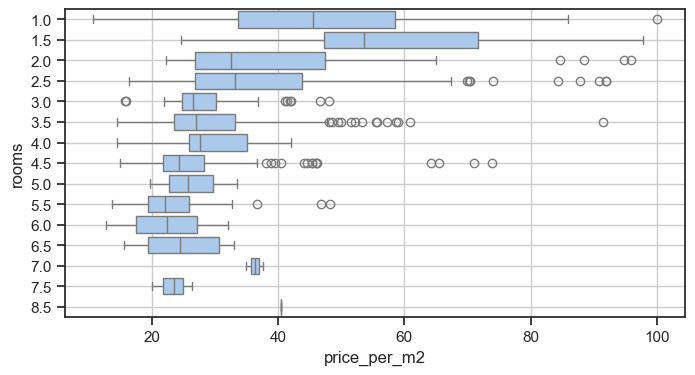

In [36]:
# Plot boxplot with groups
plt.figure(figsize=(8,4))
ax = sns.boxplot(x="price_per_m2",
                 y="rooms",
                 data=df,
                 orient='h')
plt.grid()
plt.show()

## ANOVA to compare the price_per_m2 per number of rooms (= groups)

In [37]:
# Create subsets (groups)
r2_5 = df.loc[df['rooms'] == 2.5]['price_per_m2']
r3_5 = df.loc[df['rooms'] == 3.5]['price_per_m2']
r4_5 = df.loc[df['rooms'] == 4.5]['price_per_m2']

# Create ANOVA
fvalue, p_value = stats.f_oneway(r2_5, r3_5, r4_5)

# Print results
print('F-value:', fvalue.round(3), 'p-value', p_value.round(4))

F-value: 34.26 p-value 0.0


## Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the price per m2 differ between apartments with 2.5, 3.5 and 4.5 rooms. Note that, from the ANOVA, it is not clear which groups show price differences. For this a post-hoc test could be used (not part of the exercises).</p>

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [38]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2025-11-09 20:01:58
Python Version: 3.10.5
-----------------------------------
